# 3. 비지도 학습과 데이터 전처리

### 3.4 차원 축소, 특성 추출, 매니폴드 학습

- 비지도 학습을 수행하는데 있어서 데이터 변형이 필요
- 시각화, 압축, 추가적인 처리를 통해 정보가 잘 드러나도록 표현

### 3.4.1 주성분 분석(PCA)
- 통계적으로 상관관계가 없도록 데이터 셋을 회전 시키는 기술

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split

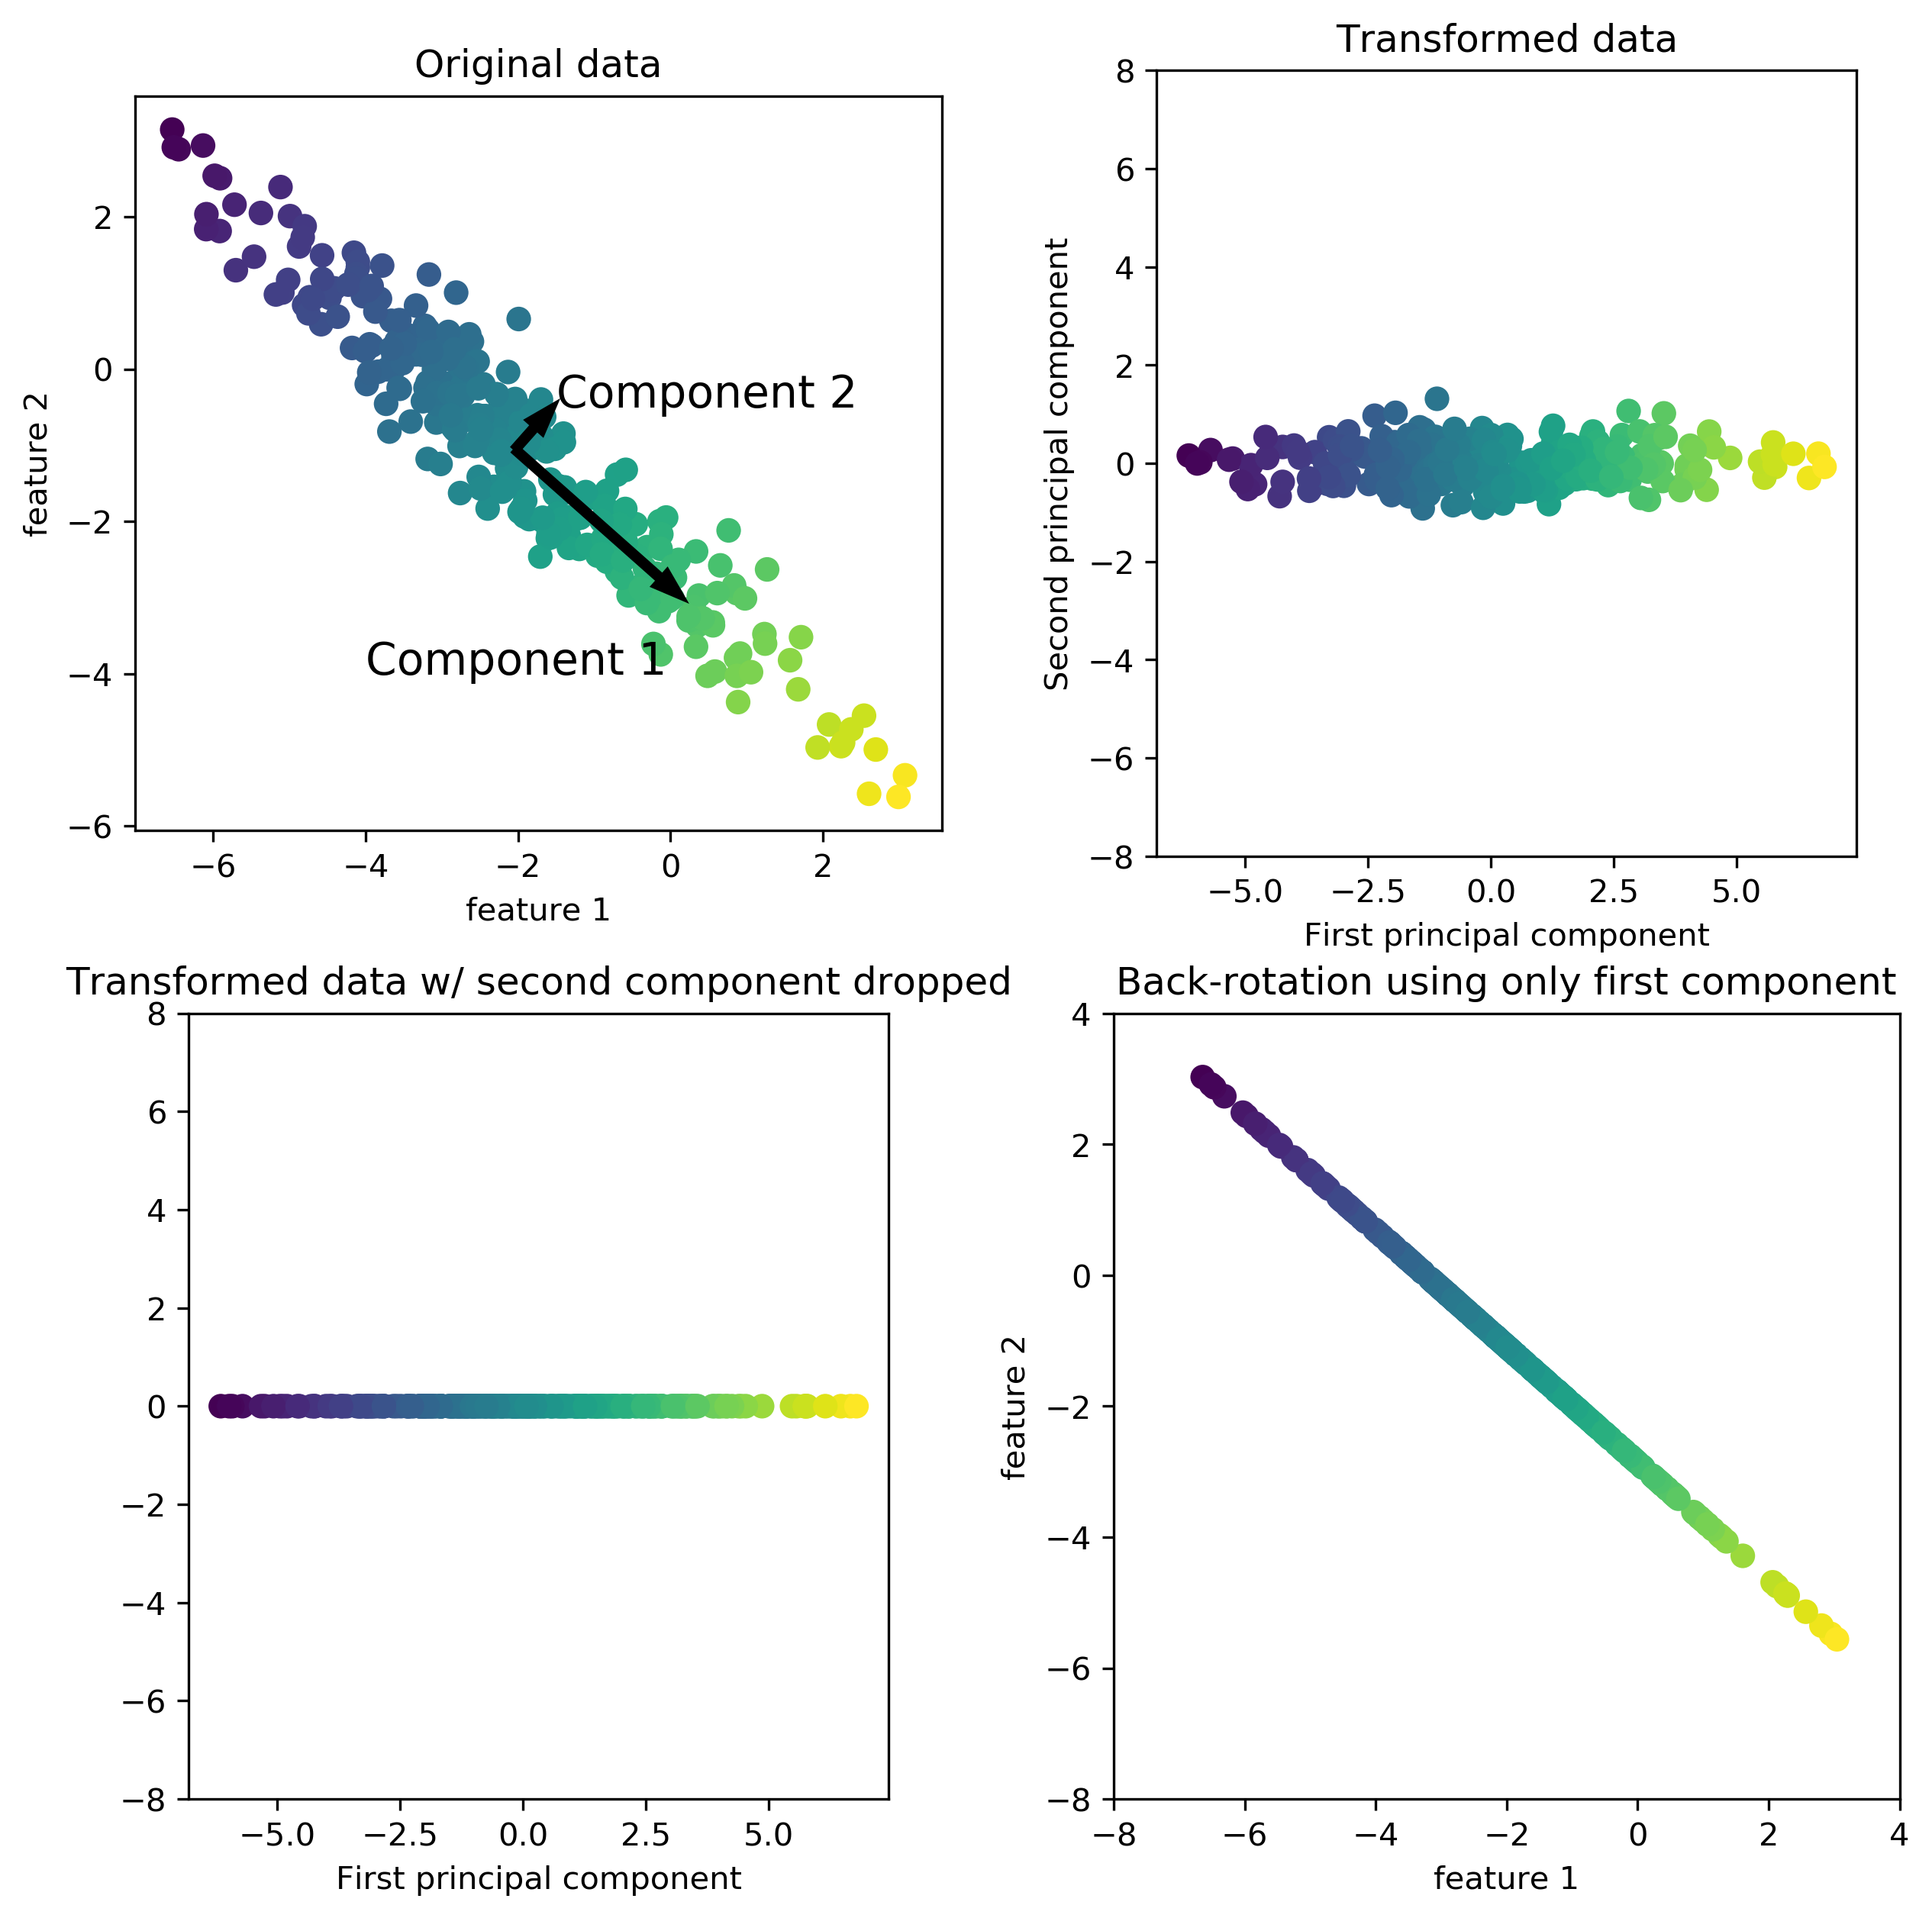

In [2]:
mglearn.plots.plot_pca_illustration()

- PCA simple examples

In [3]:
import numpy as np
print("Numpy Versio: {}\n".format(np.version.version))
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

np.random.seed(2) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]])
# 랜덤하게 샘플을 생성
# 표준 편차가 0이 되도록 랜덤하게 생성 하는 np.random.multivariate_noraml 사용
class1_sample = np.random.multivariate_normal(mean=mu_vec1, cov=cov_mat1, size=20) 
print('Class1 Sample:\n', class1_sample)
assert class1_sample.shape == (20, 3)

print()

mu_vec2 = np.array([2,2,2])
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class2_sample = np.random.multivariate_normal(mean=mu_vec2, cov=cov_mat2, size=20)
print('Class2 Samples:\n', class2_sample)
assert class2_sample.shape == (20, 3)

Numpy Versio: 1.14.2

Class1 Sample:
 [[-0.417 -0.056 -2.136]
 [ 1.640 -1.793 -0.842]
 [ 0.503 -1.245 -1.058]
 [-0.909  0.551  2.292]
 [ 0.042 -1.118  0.539]
 [-0.596 -0.019  1.175]
 [-0.748  0.009 -0.878]
 [-0.156  0.257 -0.989]
 [-0.339 -0.236 -0.638]
 [-1.188 -1.421 -0.153]
 [-0.269  2.231 -2.435]
 [ 0.113  0.370  1.360]
 [ 0.502 -0.844  0.000]
 [ 0.542 -0.314  0.771]
 [-1.868  1.731  1.468]
 [-0.336  0.611  0.048]
 [-0.829  0.088  1.000]
 [-0.381 -0.376 -0.074]
 [ 0.433  1.278 -0.635]
 [ 0.508  0.216 -1.859]]

Class2 Samples:
 [[ 1.581  1.868  1.960]
 [ 2.326 -0.040  2.046]
 [ 1.322  0.561  2.524]
 [ 2.735  1.347  2.842]
 [ 1.618  2.066  0.901]
 [ 3.584 -0.659  1.909]
 [ 2.695 -0.033  1.811]
 [ 1.923  2.825  3.248]
 [ 1.596  0.615  3.367]
 [ 3.218  1.538  2.351]
 [ 2.382  2.566  2.204]
 [ 3.407  0.262  3.041]
 [ 2.380  1.783  3.174]
 [-0.344  3.162  2.386]
 [ 0.867  2.433  1.696]
 [ 4.585  3.835  2.441]
 [ 1.281  1.417  1.675]
 [ 1.440  1.098  1.409]
 [ 1.724  1.483  1.301]
 [ 1.07

Populating the interactive namespace from numpy and matplotlib


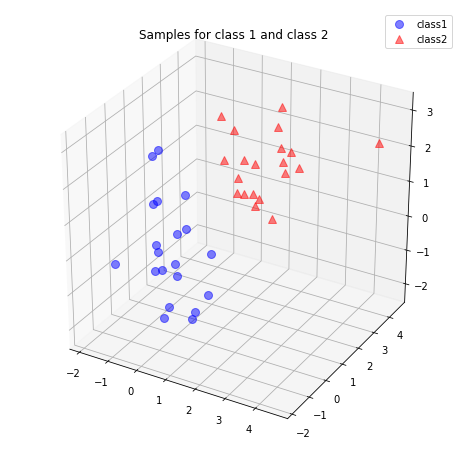

In [4]:
# class 1과 2의 샘플을 figure로 표현
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[:, 0], class1_sample[:, 1], class1_sample[:, 2], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[:, 0], class2_sample[:, 1], class2_sample[:, 2], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [5]:
# 클래스 1과 2를 묶음
all_samples = np.concatenate((class1_sample, class2_sample), axis=0)
assert all_samples.shape == (40, 3)
print('All Samples:\n', all_samples)

All Samples:
 [[-0.417 -0.056 -2.136]
 [ 1.640 -1.793 -0.842]
 [ 0.503 -1.245 -1.058]
 [-0.909  0.551  2.292]
 [ 0.042 -1.118  0.539]
 [-0.596 -0.019  1.175]
 [-0.748  0.009 -0.878]
 [-0.156  0.257 -0.989]
 [-0.339 -0.236 -0.638]
 [-1.188 -1.421 -0.153]
 [-0.269  2.231 -2.435]
 [ 0.113  0.370  1.360]
 [ 0.502 -0.844  0.000]
 [ 0.542 -0.314  0.771]
 [-1.868  1.731  1.468]
 [-0.336  0.611  0.048]
 [-0.829  0.088  1.000]
 [-0.381 -0.376 -0.074]
 [ 0.433  1.278 -0.635]
 [ 0.508  0.216 -1.859]
 [ 1.581  1.868  1.960]
 [ 2.326 -0.040  2.046]
 [ 1.322  0.561  2.524]
 [ 2.735  1.347  2.842]
 [ 1.618  2.066  0.901]
 [ 3.584 -0.659  1.909]
 [ 2.695 -0.033  1.811]
 [ 1.923  2.825  3.248]
 [ 1.596  0.615  3.367]
 [ 3.218  1.538  2.351]
 [ 2.382  2.566  2.204]
 [ 3.407  0.262  3.041]
 [ 2.380  1.783  3.174]
 [-0.344  3.162  2.386]
 [ 0.867  2.433  1.696]
 [ 4.585  3.835  2.441]
 [ 1.281  1.417  1.675]
 [ 1.440  1.098  1.409]
 [ 1.724  1.483  1.301]
 [ 1.071  4.550  0.527]]


In [6]:
print("all_samples[:, 0]\n", all_samples[:, 0], end="\n\n")
print("all_samples[:, 1]\n", all_samples[:, 1], end="\n\n")
print("all_samples[:, 2]\n", all_samples[:, 2], end="\n\n")

# 각 컬럼 별로 평균값을 구함
mean_x = np.mean(all_samples[:, 0])
mean_y = np.mean(all_samples[:, 1])
mean_z = np.mean(all_samples[:, 2])

mean_vector = np.array([[mean_x, mean_y, mean_z]])
assert mean_vector.shape == (1, 3)

print('Mean Vector:\n', mean_vector)

all_samples[:, 0]
 [-0.417  1.640  0.503 -0.909  0.042 -0.596 -0.748 -0.156 -0.339 -1.188
 -0.269  0.113  0.502  0.542 -1.868 -0.336 -0.829 -0.381  0.433  0.508
  1.581  2.326  1.322  2.735  1.618  3.584  2.695  1.923  1.596  3.218
  2.382  3.407  2.380 -0.344  0.867  4.585  1.281  1.440  1.724  1.071]

all_samples[:, 1]
 [-0.056 -1.793 -1.245  0.551 -1.118 -0.019  0.009  0.257 -0.236 -1.421
  2.231  0.370 -0.844 -0.314  1.731  0.611  0.088 -0.376  1.278  0.216
  1.868 -0.040  0.561  1.347  2.066 -0.659 -0.033  2.825  0.615  1.538
  2.566  0.262  1.783  3.162  2.433  3.835  1.417  1.098  1.483  4.550]

all_samples[:, 2]
 [-2.136 -0.842 -1.058  2.292  0.539  1.175 -0.878 -0.989 -0.638 -0.153
 -2.435  1.360  0.000  0.771  1.468  0.048  1.000 -0.074 -0.635 -1.859
  1.960  2.046  2.524  2.842  0.901  1.909  1.811  3.248  3.367  2.351
  2.204  3.041  3.174  2.386  1.696  2.441  1.675  1.409  1.301  0.527]

Mean Vector:
 [[ 0.941  0.815  0.994]]


In [7]:
cov_matrix = np.zeros((3, 3))

for i in range(all_samples.shape[0]):
    assert all_samples[i, :].shape == (3,)
    cov_matrix += (all_samples[i, :].reshape(1, 3) - mean_vector).T.dot((all_samples[i, :].reshape(1, 3) - mean_vector))

cov_matrix = cov_matrix / (40 - 1)

# covariance vector 들 사이의 상관 관계를 나타냄
# 예를들어 v1 과 v2의 관계가 적을 경우 0이 되고, v1과 v2의 관계가 높은 경우 값이 올라감
print('Covariance Matrix:\n', cov_matrix)

Covariance Matrix:
 [[ 2.196  0.598  1.276]
 [ 0.598  2.068  0.851]
 [ 1.276  0.851  2.422]]


In [8]:
 assert all_samples.shape == (40, 3)
cov_mat = np.cov(all_samples.T) # 위의 함수 없이 numpy의 cov 함수를 사용하여 코베리언스를 나타내줌 (컬럼 간의 관계)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 2.196  0.598  1.276]
 [ 0.598  2.068  0.851]
 [ 1.276  0.851  2.422]]


In [9]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat) # numpy의 linalg.eig를 통해서 아이젠 벨류와 벡터값이 나옴
print('{} \n\n {}'.format(eig_val_cov, eig_vec_cov))
print()
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3)
    print('Eigenvalue {}: {}'.format(i+1, eig_val_cov[i]))
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print(40 * '-')

[ 4.112  1.000  1.573] 

 [[-0.588 -0.667  0.458]
 [-0.452 -0.199 -0.870]
 [-0.671  0.718  0.184]]

Eigenvalue 1: 4.112349421674584
Eigenvector 1: 
[[-0.588 -0.452 -0.671]]
----------------------------------------
Eigenvalue 2: 1.0003892833440393
Eigenvector 2: 
[[-0.667 -0.199  0.718]]
----------------------------------------
Eigenvalue 3: 1.5729106449928036
Eigenvector 3: 
[[ 0.458 -0.870  0.184]]
----------------------------------------


In [10]:
for v1 in eig_vec_cov.T:
    for v2 in eig_vec_cov.T:
        print(v1.dot(v2), end=", ")
    print()

print()

for i in range(len(eig_val_cov)):
    eigv = eig_vec_cov[:, i]
    np.testing.assert_array_almost_equal(np.matmul(cov_mat, eigv), eig_val_cov[i] * eigv)
    print('{} \n:\n {}'.format(np.matmul(cov_mat, eigv), eig_val_cov[i] * eigv))
    print('Uint length Check: {}'.format(np.linalg.norm(eigv))) #아이젠 벡터의 크기를 구하는 함수
    print()

0.9999999999999998, -2.7755575615628914e-16, 1.249000902703301e-16, 
-2.7755575615628914e-16, 0.9999999999999998, -4.163336342344337e-16, 
1.249000902703301e-16, -4.163336342344337e-16, 1.0, 

[-2.418 -1.857 -2.760] 
:
 [-2.418 -1.857 -2.760]
Uint length Check: 0.9999999999999999

[-0.667 -0.199  0.718] 
:
 [-0.667 -0.199  0.718]
Uint length Check: 0.9999999999999999

[ 0.720 -1.368  0.290] 
:
 [ 0.720 -1.368  0.290]
Uint length Check: 1.0



[-0.588 -0.452 -0.671]
[-0.667 -0.199  0.718]
[ 0.458 -0.870  0.184]


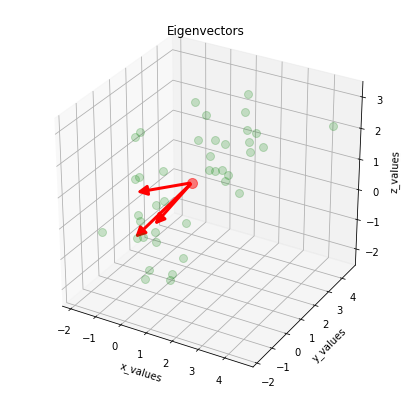

In [11]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[:, 0], all_samples[:, 1], all_samples[:, 2], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)

for v in eig_vec_cov.T:
    print(v)
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

    ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

- PCA를 적용해 유방암 데이터셋 시각화하기
    - 클래스별 특성 히스토그램

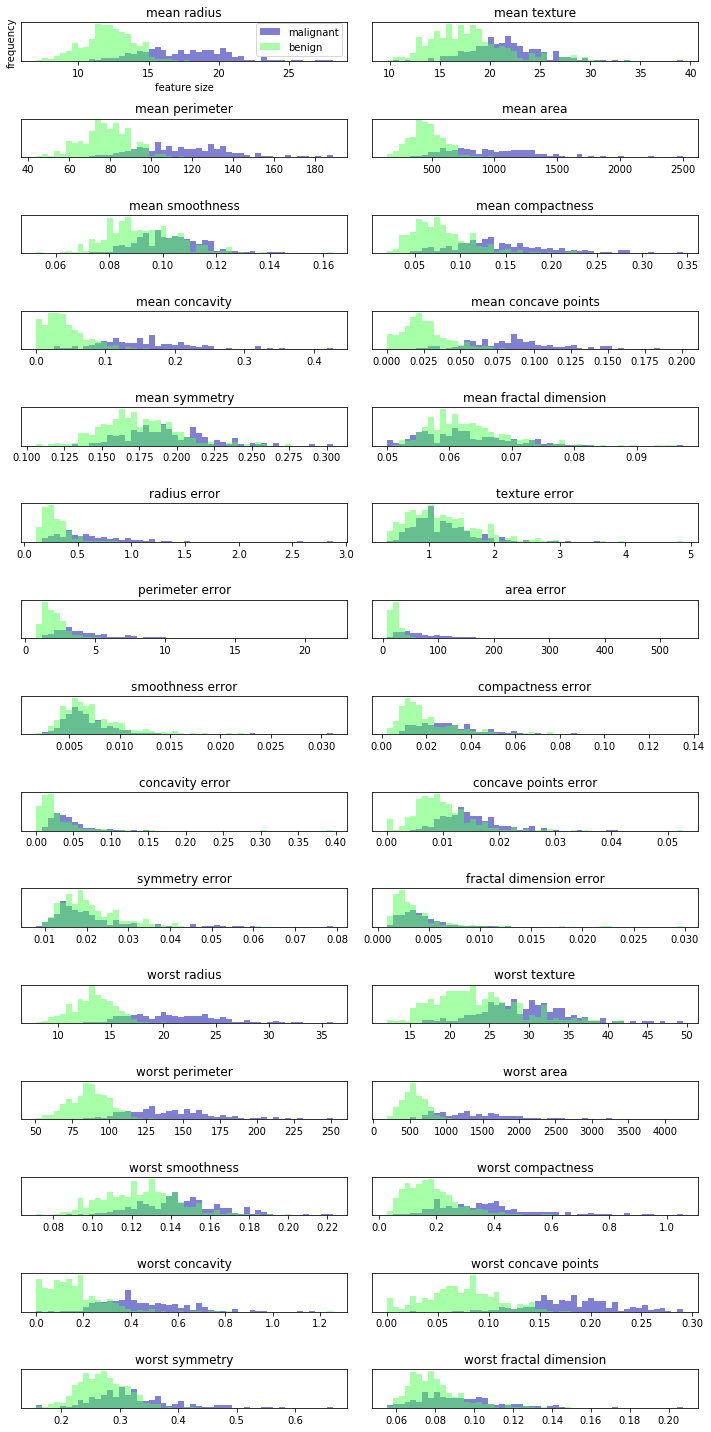

In [15]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("feature size")
ax[0].set_ylabel("frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scala = StandardScaler()

scala.fit(cancer.data)
X_scaled = scala.transform(cancer.data)
print(X_scaled.shape)

(569, 30)


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
print("P: {}".format(pca.components_.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)
P: (2, 30)


Text(0,0.5,'Second PCA')

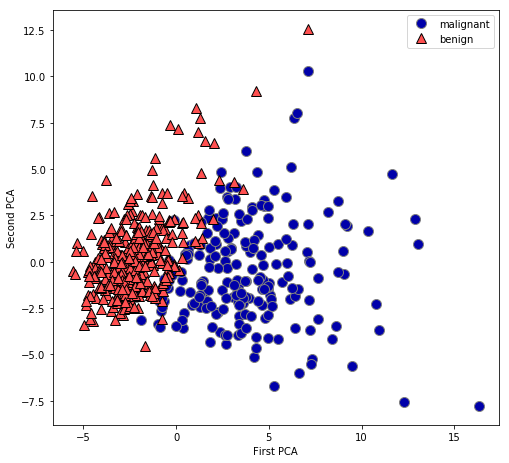

In [17]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["malignant", "benign"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First PCA")
plt.ylabel("Second PCA")

In [18]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (2, 30)


- 주성분 데이터를 하나씩 components를 통해 나타낼 수 있으며, 중요도에 따라 정렬되어 있다.

In [19]:
print("PCA 주성분:\n{}".format(pca.components_))

PCA 주성분:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.170  0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.210  0.229  0.251  0.123  0.132]
 [-0.234 -0.060 -0.215 -0.231  0.186  0.152  0.060 -0.035  0.190  0.367
  -0.106  0.090 -0.089 -0.152  0.204  0.233  0.197  0.130  0.184  0.280
  -0.220 -0.045 -0.200 -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


- 이를 다시 히트맵으로 시각화 하여 나타낸 경우
    - 첫번째 주성분의 모든 특성은 부호가 같다.
    - 공통의상호 관계가 있어 한 특성의 값이 커지면, 모두 같이 높아질 것
    - 두번째는 모든 특성이 섞여 있어 서로 개별적으로 구분이 됨

Text(0,0.5,'PCA')

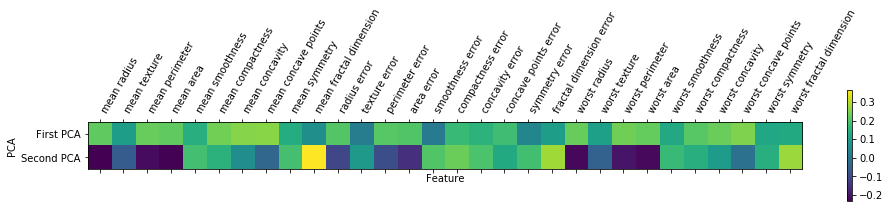

In [21]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First PCA", "Second PCA"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("PCA")

### 고유얼굴(eigenface) 특성 추출
- 특성 추출은 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수 있을 것 (어쩌면..?)
- PCA를 활용한 얼굴 이미지에서 특성 추출하는 어플리케이션

/Users/kyo/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/kyo/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


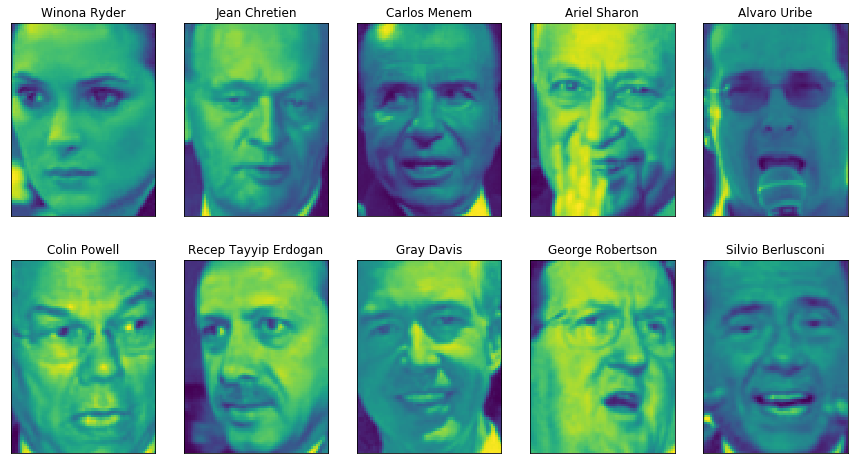

In [22]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [23]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [26]:
# 각 타깃이 나타난 횟수 계산
coupeople = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

- 조지부시와 콜린 파웰의 데이터가 편중 된 것을 확인
- 데이터의 편중 제거를 위해 사람 마다 50개의 이미지 선택

In [28]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정
# MinMaxScaler를 적용하는 것과 흡사함
X_people = X_people / 255.

In [33]:
print("X_people shape: {}".format(X_people.shape))
print("y_people shape: {}".format(y_people.shape))
X_people[:2]

X_people shape: (2063, 5655)
y_people shape: (2063,)


array([[ 0.224,  0.237,  0.306, ...,  0.068,  0.065,  0.089],
       [ 0.261,  0.316,  0.348, ...,  0.034,  0.033,  0.037]],
      dtype=float32)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


- 클래스 62개를 분류하는 문제에서는 23%는 나쁜 결과는 아님
- 네번에 한번 꼴로 인식, 따라서 PCA 를 활용한 결과가 필요

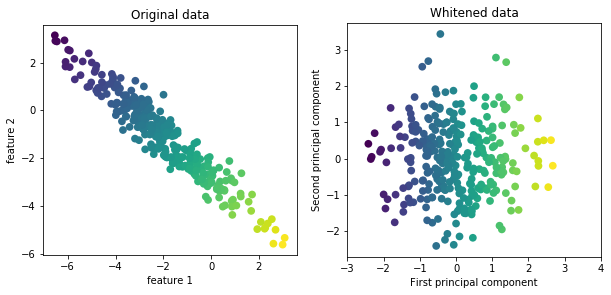

In [35]:
mglearn.plots.plot_pca_whitening()

In [36]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test Accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test Accuracy: 0.31


- 주성분 분석이 좀더 나은 결과를 보임 23 --> 31 로 오름

In [39]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


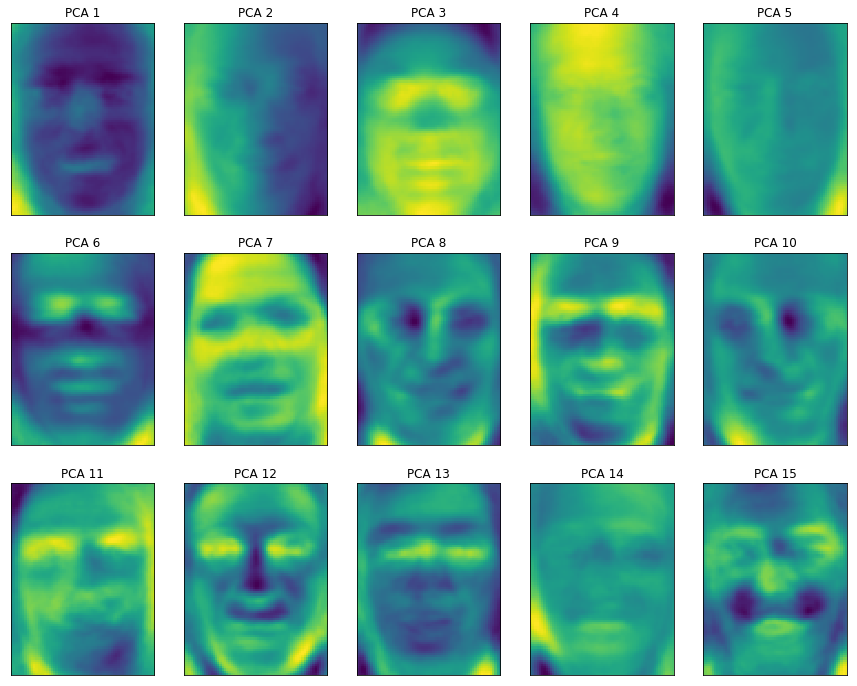

In [40]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("PCA {}".format((i + 1)))

- 얼굴의 특징을 잡아낸 모습
- 첫 번째, 주성분은 얼굴과 배경의 명암차이를 기록
- 두 번째, 오른쪽과 왼쪽 조명의 차이

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 2.9s, 0.0min


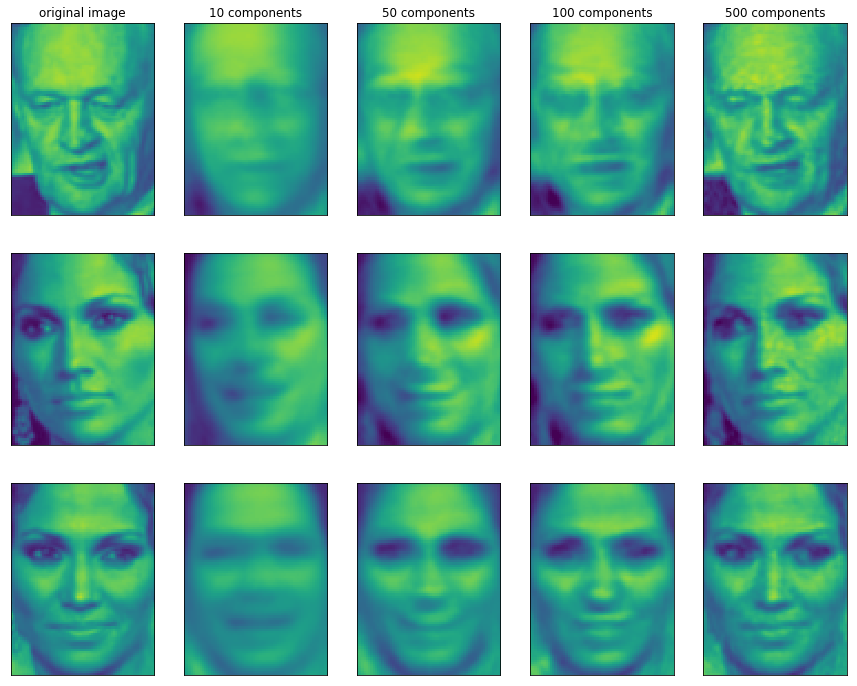

In [41]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

- 누구의 얼굴의 데이터 셋인지 데이터를 클래스로 구분해 산점도로 나타냄

Text(0,0.5,'Second PCA')

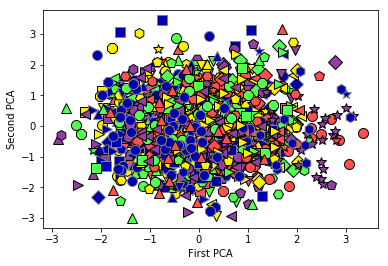

In [42]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First PCA")
plt.ylabel("Second PCA")